# Solar Data EDA - Benin (Malanville)

## 🌞 Project Overview
This notebook performs Exploratory Data Analysis (EDA) on solar irradiance data from Benin (Malanville location).

### 📋 Analysis Goals:
1. **Data Overview** - Basic statistics and structure
2. **Data Quality** - Missing values, outliers, data types
3. **Solar Irradiance Analysis** - GHI, DNI, DHI patterns
4. **Weather Analysis** - Temperature, humidity, wind patterns
5. **Time Series Analysis** - Seasonal and daily patterns
6. **Data Cleaning** - Handle missing values and outliers
7. **Export Clean Data** - Save processed dataset

### 🔑 Key Variables:
- **GHI**: Global Horizontal Irradiance (W/m²)
- **DNI**: Direct Normal Irradiance (W/m²)
- **DHI**: Diffuse Horizontal Irradiance (W/m²)
- **Tamb**: Ambient Temperature (°C)
- **RH**: Relative Humidity (%)
- **WS**: Wind Speed (m/s)

## 📚 1. Import Libraries and Setup

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Warnings and display settings
import warnings

warnings.filterwarnings("ignore")

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Set plot style
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.2.6


## 📂 2. Load and Initial Data Exploration

In [5]:
# Load the Benin dataset
file_path = "../data/benin-malanville.csv"

print("📥 Loading Benin (Malanville) solar data...")
df_benin = pd.read_csv(file_path)

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df_benin.shape[0]:,} rows × {df_benin.shape[1]} columns")
print(f"💾 Memory usage: {df_benin.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📥 Loading Benin (Malanville) solar data...


✅ Data loaded successfully!
📊 Dataset shape: 525,600 rows × 19 columns
💾 Memory usage: 108.77 MB


In [6]:
# Display basic information about the dataset
print("🔍 DATASET OVERVIEW")
print("=" * 50)
print("\n📋 Column Names and Data Types:")
print(df_benin.dtypes)

print("\n👀 First Few Rows:")
df_benin.head()

🔍 DATASET OVERVIEW

📋 Column Names and Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

👀 First Few Rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
# Convert Timestamp to datetime and set as index
print("🕐 Converting Timestamp to datetime...")
df_benin["Timestamp"] = pd.to_datetime(df_benin["Timestamp"])
df_benin.set_index("Timestamp", inplace=True)

print("✅ Timestamp conversion complete!")
print(f"📅 Date range: {df_benin.index.min()} to {df_benin.index.max()}")
print(f"⏱️  Duration: {df_benin.index.max() - df_benin.index.min()}")

🕐 Converting Timestamp to datetime...
✅ Timestamp conversion complete!
📅 Date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
⏱️  Duration: 364 days 23:59:00
✅ Timestamp conversion complete!
📅 Date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
⏱️  Duration: 364 days 23:59:00


## 📊 3. Summary Statistics

In [ ]:
# Generate comprehensive summary statistics
print("📈 SUMMARY STATISTICS")
print("=" * 50)

# Key solar irradiance columns
solar_columns = ["GHI", "DNI", "DHI"]
weather_columns = ["Tamb", "RH", "WS", "WSgust", "WD", "BP"]

print("\n☀️ Solar Irradiance Statistics:")
df_benin[solar_columns].describe().round(2)

📈 SUMMARY STATISTICS

☀️ Solar Irradiance Statistics:


,GHI,DNI,DHI
count,525600.00,525600.00,525600.00
mean,240.56,167.19,115.36
std,331.13,261.71,158.69
min,-12.90,-7.80,-12.60
25%,-2.00,-0.50,-2.10
50%,1.80,-0.10,1.60
75%,483.40,314.20,216.30
max,1413.00,952.30,759.20


In [9]:
print("🌤️ Weather Variables Statistics:")
df_benin[weather_columns].describe().round(2)

🌤️ Weather Variables Statistics:


,Tamb,RH,WS,WSgust,WD,BP
count,525600.00,525600.00,525600.00,525600.00,525600.00,525600.00
mean,28.18,54.49,2.12,2.81,153.44,994.20
std,5.92,28.07,1.60,2.03,102.33,2.47
min,11.00,2.10,0.00,0.00,0.00,985.00
25%,24.20,28.80,1.00,1.30,59.00,993.00
50%,28.00,55.10,1.90,2.60,181.00,994.00
75%,32.30,80.10,3.10,4.10,235.10,996.00
max,43.80,100.00,19.50,26.60,360.00,1003.00


## ❓ 4. Missing Values Analysis

🔍 MISSING VALUES ANALYSIS
❌ Columns with missing values:
          Missing Count  Missing Percentage
Comments         525600               100.0


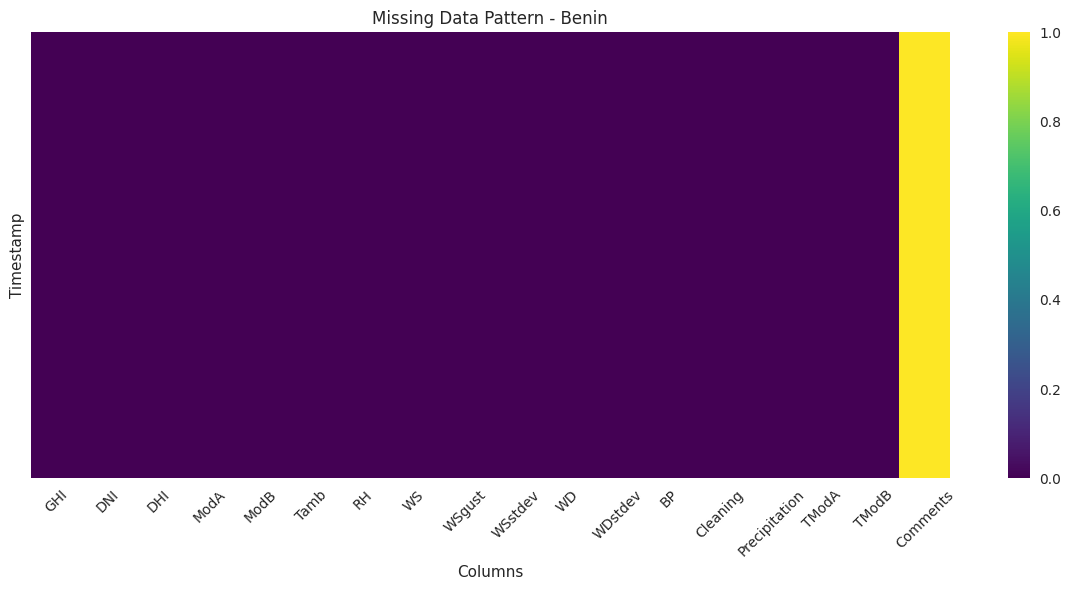

In [10]:
# Analyze missing values
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = df_benin.isnull().sum()
missing_percentage = (missing_data / len(df_benin)) * 100

missing_summary = pd.DataFrame(
    {"Missing Count": missing_data, "Missing Percentage": missing_percentage.round(2)}
)

# Show only columns with missing values
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary = missing_summary.sort_values("Missing Count", ascending=False)

if len(missing_summary) > 0:
    print("❌ Columns with missing values:")
    print(missing_summary)
else:
    print("✅ No missing values found!")

# Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df_benin.isnull(), cbar=True, yticklabels=False, cmap="viridis")
plt.title("Missing Data Pattern - Benin")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🎯 5. Outlier Detection (Z-Score Method)

In [11]:
# Outlier detection using Z-score method
print("🎯 OUTLIER DETECTION (Z-Score > 3)")
print("=" * 50)

# Select numeric columns for outlier analysis
numeric_columns = df_benin.select_dtypes(include=[np.number]).columns.tolist()

outlier_counts = {}
z_threshold = 3

for col in numeric_columns:
    if col in ["ModA", "ModB", "Cleaning"]:  # Skip binary/categorical columns
        continue

    # Calculate z-scores (handle missing values)
    z_scores = np.abs(zscore(df_benin[col], nan_policy="omit"))
    outliers = np.sum(z_scores > z_threshold)
    outlier_percentage = (outliers / len(df_benin[col].dropna())) * 100

    outlier_counts[col] = {"Count": outliers, "Percentage": outlier_percentage}

# Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_counts).T
outlier_df["Percentage"] = outlier_df["Percentage"].round(2)
outlier_df = outlier_df.sort_values("Count", ascending=False)

print("🔍 Outlier Summary (Z-score > 3):")
print(outlier_df)

🎯 OUTLIER DETECTION (Z-Score > 3)
🔍 Outlier Summary (Z-score > 3):
                Count  Percentage
WSstdev        5653.0        1.08
WDstdev        4765.0        0.91
DHI            3738.0        0.71
WSgust         3500.0        0.67
WS             3109.0        0.59
Precipitation  1402.0        0.27
BP              865.0        0.16
TModB            98.0        0.02
GHI              89.0        0.02
TModA            10.0        0.00
DNI               0.0        0.00
Tamb              0.0        0.00
RH                0.0        0.00
WD                0.0        0.00
Comments          0.0         NaN


## 📈 6. Solar Irradiance Visualization

☀️ SOLAR IRRADIANCE ANALYSIS


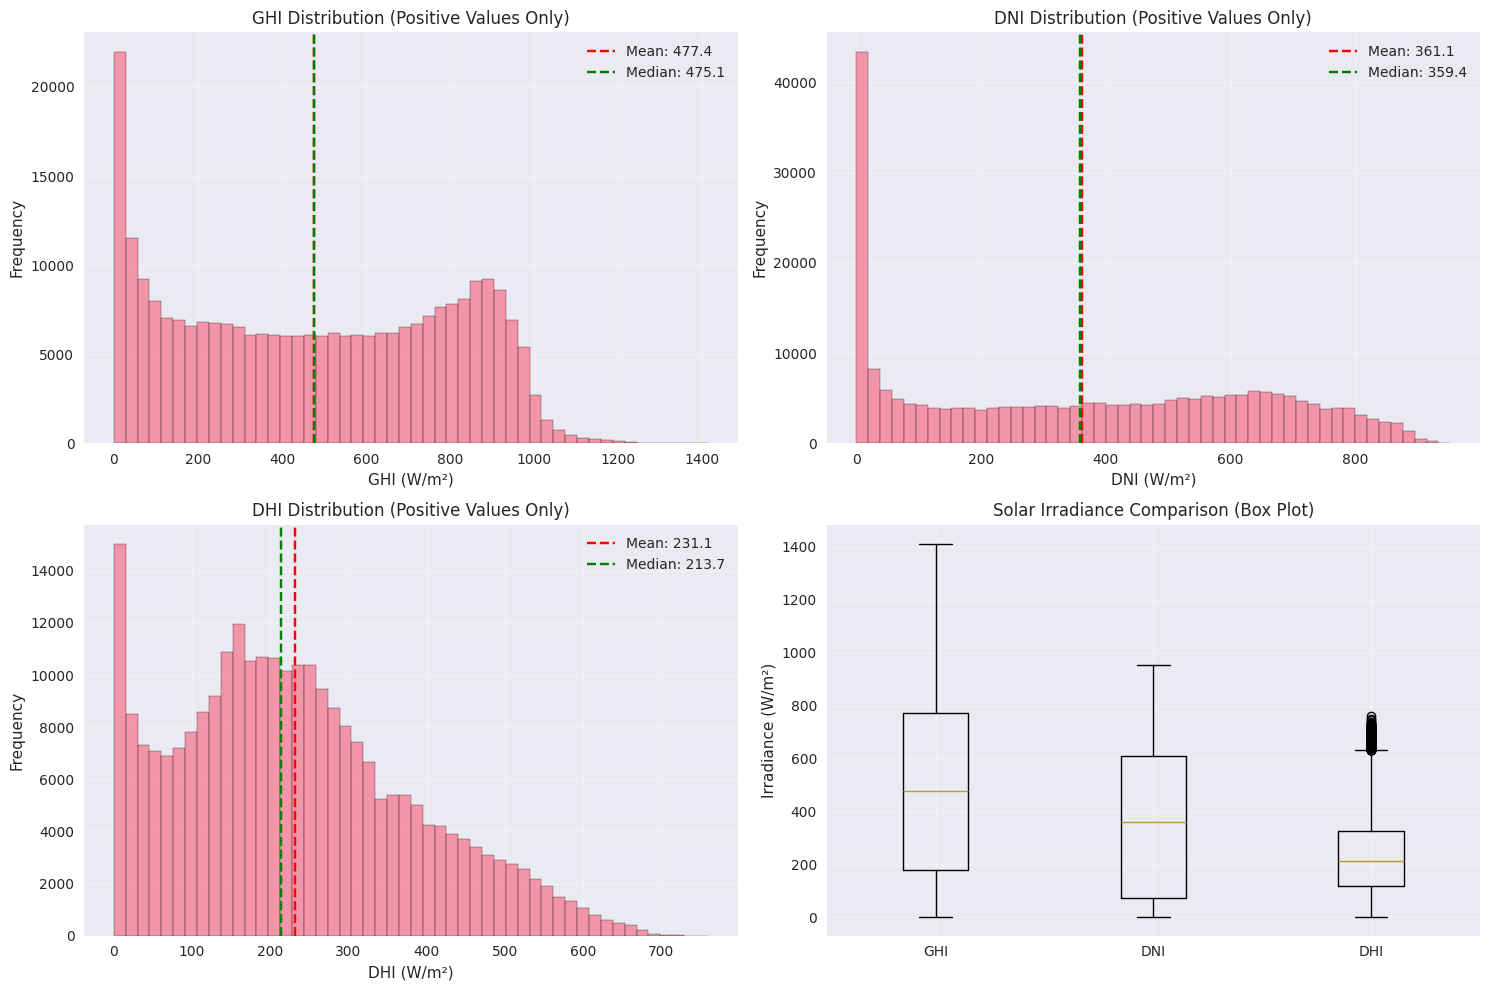

In [12]:
# Solar irradiance distribution plots
print("☀️ SOLAR IRRADIANCE ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for each solar variable
for i, col in enumerate(solar_columns):
    ax = axes[i // 2, i % 2]

    # Filter positive values only (negative values are nighttime/measurement errors)
    positive_values = df_benin[df_benin[col] > 0][col]

    ax.hist(positive_values, bins=50, alpha=0.7, edgecolor="black")
    ax.set_title(f"{col} Distribution (Positive Values Only)")
    ax.set_xlabel(f"{col} (W/m²)")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

    # Add statistics
    mean_val = positive_values.mean()
    median_val = positive_values.median()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f}")
    ax.axvline(
        median_val, color="green", linestyle="--", label=f"Median: {median_val:.1f}"
    )
    ax.legend()

# Box plot for comparison
ax = axes[1, 1]
solar_data_positive = []
labels = []

for col in solar_columns:
    positive_values = df_benin[df_benin[col] > 0][col]
    solar_data_positive.append(positive_values)
    labels.append(col)

ax.boxplot(solar_data_positive, labels=labels)
ax.set_title("Solar Irradiance Comparison (Box Plot)")
ax.set_ylabel("Irradiance (W/m²)")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🌡️ 7. Weather Variables Analysis

🌤️ WEATHER VARIABLES ANALYSIS


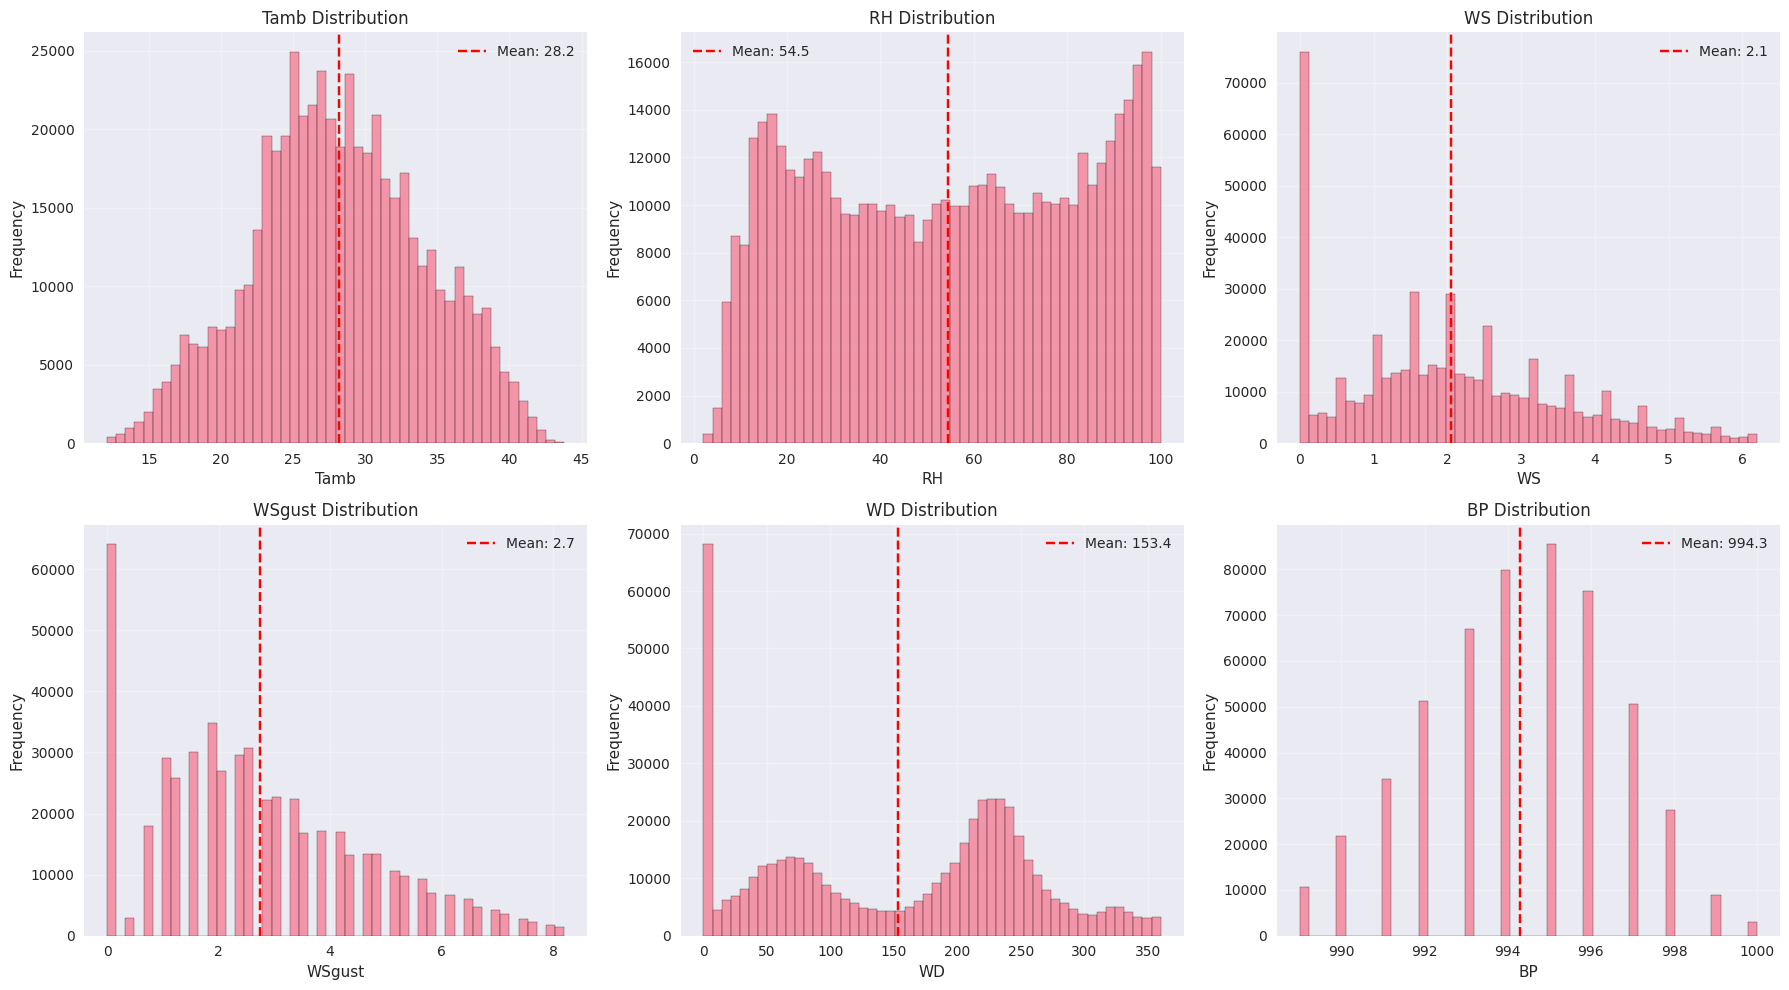

In [13]:
# Weather variables visualization
print("🌤️ WEATHER VARIABLES ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(weather_columns):
    ax = axes[i]

    # Remove outliers for better visualization
    Q1 = df_benin[col].quantile(0.25)
    Q3 = df_benin[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = df_benin[
        (df_benin[col] >= lower_bound) & (df_benin[col] <= upper_bound)
    ][col]

    ax.hist(filtered_data.dropna(), bins=50, alpha=0.7, edgecolor="black")
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

    # Add mean line
    mean_val = filtered_data.mean()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f}")
    ax.legend()

plt.tight_layout()
plt.show()

## 🕐 8. Time Series Analysis

📅 TIME SERIES ANALYSIS


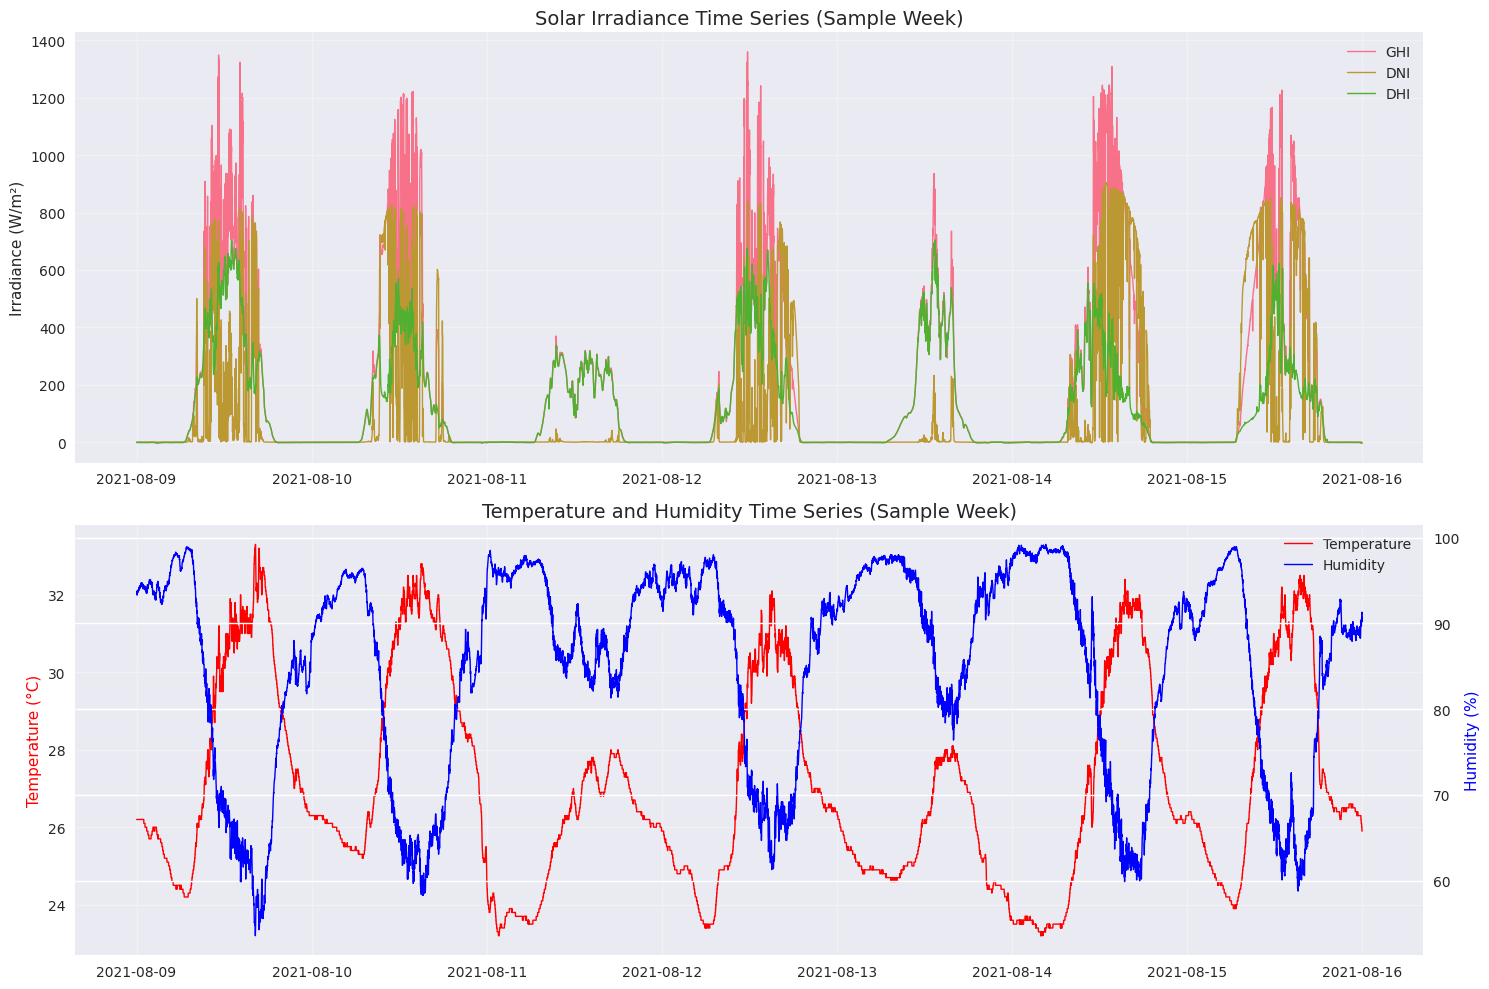

In [14]:
# Time series analysis - Daily patterns
print("📅 TIME SERIES ANALYSIS")
print("=" * 50)

# Sample a representative week for detailed analysis
sample_week = df_benin["2021-08-09":"2021-08-15"]  # One week sample

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Solar irradiance time series
for col in solar_columns:
    axes[0].plot(sample_week.index, sample_week[col], label=col, linewidth=1)

axes[0].set_title("Solar Irradiance Time Series (Sample Week)", fontsize=14)
axes[0].set_ylabel("Irradiance (W/m²)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Temperature and humidity
ax2 = axes[1]
ax2_twin = ax2.twinx()

line1 = ax2.plot(
    sample_week.index, sample_week["Tamb"], "r-", label="Temperature", linewidth=1
)
line2 = ax2_twin.plot(
    sample_week.index, sample_week["RH"], "b-", label="Humidity", linewidth=1
)

ax2.set_ylabel("Temperature (°C)", color="r")
ax2_twin.set_ylabel("Humidity (%)", color="b")
ax2.set_title("Temperature and Humidity Time Series (Sample Week)", fontsize=14)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc="upper right")

ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔗 9. Correlation Analysis

🔗 CORRELATION ANALYSIS


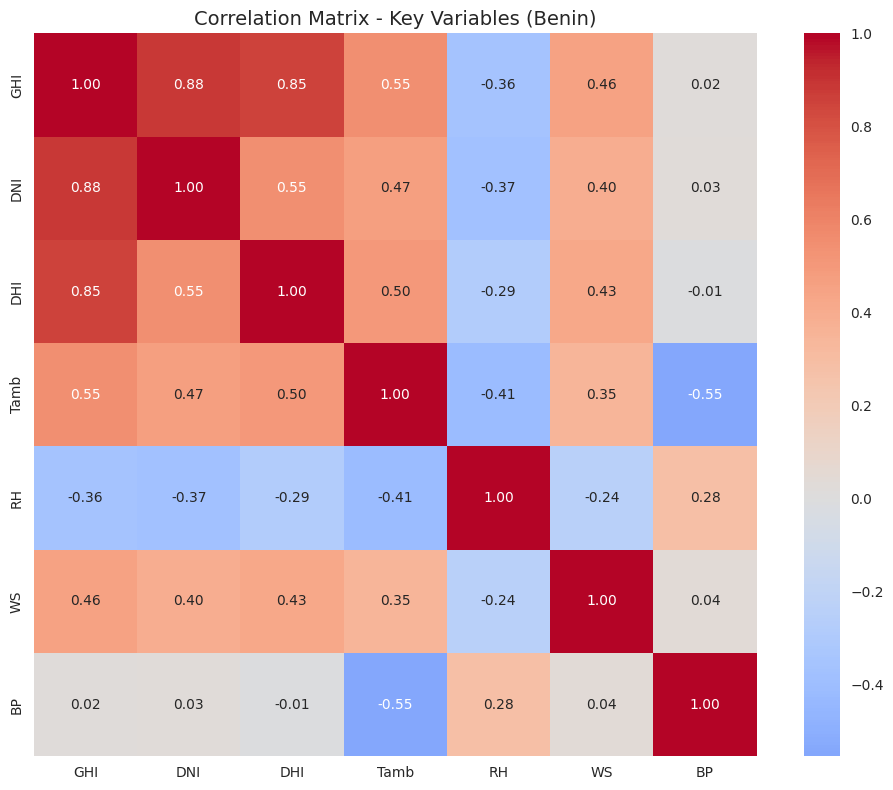


🔥 Strongest Positive Correlations:
GHI  DNI     0.882376
     DHI     0.849989
     Tamb    0.547513
DNI  DHI     0.546602
DHI  Tamb    0.503925
dtype: float64

❄️ Strongest Negative Correlations:
DHI   RH   -0.285018
GHI   RH   -0.360029
DNI   RH   -0.373475
Tamb  RH   -0.414842
      BP   -0.553705
dtype: float64


In [ ]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Select key variables for correlation
correlation_vars = ["GHI", "DNI", "DHI", "Tamb", "RH", "WS", "BP"]
correlation_matrix = df_benin[correlation_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f"
)
plt.title("Correlation Matrix - Key Variables (Benin)", fontsize=14)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\n🔥 Strongest Positive Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
strong_corr = upper_triangle.stack().sort_values(ascending=False)  # type: ignore
print(strong_corr.head(5))

print("\n❄️ Strongest Negative Correlations:")
print(strong_corr.tail(5))

## 🧹 10. Data Cleaning

In [16]:
# Data cleaning process
print("🧹 DATA CLEANING PROCESS")
print("=" * 50)

# Create a copy for cleaning
df_clean = df_benin.copy()

print(f"📊 Original dataset shape: {df_clean.shape}")

# 1. Handle negative solar irradiance values (set to 0 for nighttime)
solar_cols = ["GHI", "DNI", "DHI"]
for col in solar_cols:
    negative_count = (df_clean[col] < 0).sum()
    print(f"🌙 {col}: {negative_count:,} negative values (setting to 0)")
    df_clean[col] = df_clean[col].clip(lower=0)

# 2. Remove extreme outliers (Z-score > 4) for key variables
outlier_threshold = 4
key_vars = ["GHI", "DNI", "DHI", "Tamb", "RH", "WS"]

rows_before = len(df_clean)
for col in key_vars:
    z_scores = np.abs(zscore(df_clean[col], nan_policy="omit"))
    outlier_mask = z_scores > outlier_threshold
    outlier_count = outlier_mask.sum()

    if outlier_count > 0:
        print(f"🎯 {col}: Removing {outlier_count:,} extreme outliers")
        df_clean = df_clean[~outlier_mask]

rows_after = len(df_clean)
removed_rows = rows_before - rows_after

print(f"\n✂️ Removed {removed_rows:,} rows ({(removed_rows/rows_before)*100:.2f}%)")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")

# 3. Handle missing values by forward fill (appropriate for time series)
missing_before = df_clean.isnull().sum().sum()
df_clean = df_clean.fillna(method="ffill").fillna(method="bfill")
missing_after = df_clean.isnull().sum().sum()

print(f"💧 Filled {missing_before - missing_after:,} missing values")
print(f"✅ Final missing values: {missing_after}")

🧹 DATA CLEANING PROCESS
📊 Original dataset shape: (525600, 18)
🌙 GHI: 258,847 negative values (setting to 0)
🌙 DNI: 275,987 negative values (setting to 0)
🌙 DHI: 259,182 negative values (setting to 0)
🎯 DHI: Removing 2 extreme outliers
🎯 WS: Removing 976 extreme outliers

✂️ Removed 978 rows (0.19%)
📊 Cleaned dataset shape: (524622, 18)
💧 Filled 0 missing values
✅ Final missing values: 524622


## 📤 11. Export Cleaned Dataset

In [17]:
# Export cleaned dataset
print("💾 EXPORTING CLEANED DATASET")
print("=" * 50)

# Create output directory if it doesn't exist
import os

output_dir = "../data/"
os.makedirs(output_dir, exist_ok=True)

# Save cleaned dataset
output_file = os.path.join(output_dir, "benin_cleaned.csv")
df_clean.to_csv(output_file)

print(f"✅ Cleaned dataset saved to: {output_file}")
print(f"📊 Final dataset shape: {df_clean.shape}")
print(f"💾 File size: {os.path.getsize(output_file) / 1024**2:.2f} MB")

# Display summary statistics of cleaned data
print("\n📈 CLEANED DATA SUMMARY")
print("=" * 30)
print("\n☀️ Solar Irradiance (cleaned):")
print(df_clean[solar_columns].describe().round(2))

💾 EXPORTING CLEANED DATASET
✅ Cleaned dataset saved to: ../data/benin_cleaned.csv
📊 Final dataset shape: (524622, 18)
💾 File size: 48.64 MB

📈 CLEANED DATA SUMMARY

☀️ Solar Irradiance (cleaned):
             GHI        DNI        DHI
count  524622.00  524622.00  524622.00
mean      242.37     167.73     117.18
std       330.24     261.68     157.53
min         0.00       0.00       0.00
25%         0.00       0.00       0.00
50%         2.00       0.00       1.70
75%       484.50     315.20     216.60
max      1413.00     952.30     745.80


## 📝 12. Key Insights Summary

In [18]:
# Generate key insights
print("📝 KEY INSIGHTS - BENIN (MALANVILLE)")
print("=" * 50)

# Solar irradiance insights
ghi_max = df_clean["GHI"].max()
ghi_mean = df_clean[df_clean["GHI"] > 0]["GHI"].mean()
dni_max = df_clean["DNI"].max()
dni_mean = df_clean[df_clean["DNI"] > 0]["DNI"].mean()

print(f"☀️ SOLAR IRRADIANCE:")
print(f"   • Peak GHI: {ghi_max:.1f} W/m²")
print(f"   • Average GHI (daylight): {ghi_mean:.1f} W/m²")
print(f"   • Peak DNI: {dni_max:.1f} W/m²")
print(f"   • Average DNI (daylight): {dni_mean:.1f} W/m²")

# Weather insights
temp_range = f"{df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C"
avg_temp = df_clean["Tamb"].mean()
avg_humidity = df_clean["RH"].mean()
avg_wind = df_clean["WS"].mean()

print(f"\n🌡️ WEATHER CONDITIONS:")
print(f"   • Temperature range: {temp_range}")
print(f"   • Average temperature: {avg_temp:.1f}°C")
print(f"   • Average humidity: {avg_humidity:.1f}%")
print(f"   • Average wind speed: {avg_wind:.1f} m/s")

# Data quality insights
data_completeness = (
    1 - df_benin.isnull().sum().sum() / (df_benin.shape[0] * df_benin.shape[1])
) * 100
outlier_percentage = (removed_rows / rows_before) * 100

print(f"\n📊 DATA QUALITY:")
print(f"   • Original completeness: {data_completeness:.2f}%")
print(f"   • Outliers removed: {outlier_percentage:.2f}%")
print(f"   • Final dataset: {df_clean.shape[0]:,} records")

print(f"\n✅ Benin EDA completed successfully!")

📝 KEY INSIGHTS - BENIN (MALANVILLE)
☀️ SOLAR IRRADIANCE:
   • Peak GHI: 1413.0 W/m²
   • Average GHI (daylight): 477.8 W/m²
   • Peak DNI: 952.3 W/m²
   • Average DNI (daylight): 361.6 W/m²

🌡️ WEATHER CONDITIONS:
   • Temperature range: 11.0°C to 43.8°C
   • Average temperature: 28.2°C
   • Average humidity: 54.4%
   • Average wind speed: 2.1 m/s

📊 DATA QUALITY:
   • Original completeness: 94.44%
   • Outliers removed: 0.19%
   • Final dataset: 524,622 records

✅ Benin EDA completed successfully!
